<h1 align="center"> Project Setup </h1>

#### Install Packages

In [1]:
!pip install yellowbrick

#### Importing Dependencies

In [2]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

#### Importing Datasets

In [3]:
# Display all columns in the DataFrame using pandas settings
pd.set_option('display.max_columns', None)

In [4]:
df_imports = pd.read_excel('data/WtoData_worldwide_import_from_2010_to_2022_all_countries.xlsx')

<br><br>

<h1 align="center"> Summary</h1>

### Objective

This project focuses on how the country will be able to know the right market to export their products. This will allow the country to get a good guide on foreign trade, and know which countries have High demand in different sectors, especially agricultural products.

The specific objectives of this project are:
1. Analyzethedatasetthatwearegoingtocollecttobetterunderstandandgive
some insight on the international trade
2. ChoosethebestplacewiththeHighdemandforagriculturalproductssothat Haiti can promote and sell its products

<hr>

### Hypothesis: Research Question?

What is the question that you would like to answer in order to make a decision.

<hr>

### Data Source

For this project we will be using the World Trade Organization(WTO) data portal to have access to. The WTO Data portal contains statistical indicators, Available time series cover merchandise trade and trade in services statistics, market access indicators (bound, applied & preferential tariffs), non-tariff information as well as other indicators.

<br><br>

<h1 align="center"> Data Cleaning </h1>

#### Introduce the Data

In [5]:
# Displaying the countries import product dataframe
print('------ Imports Dataset ------')
display(df_imports.head(4))

------ Imports Dataset ------


,Indicator,Merchandise imports by product group – annual (Million US dollar),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Reporting Economy,Product/Sector,Partner Economy,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
2,World,SI3_AGG - TO - Total merchandise,World,15438092.0,18438364.0,18657296.0,18966119.0,19060809.0,16733507.0,16211194.0,17985896.0,19836342.0,19284167.0,17812107.0
3,World,SI3_AGG - AG - Agricultural products,World,1391529.0,1701893.0,1681611.0,1756648.0,1798003.0,1594510.0,1599989.0,1759978.0,1851346.0,1823105.0,NaN


In [6]:
print('------------------------------ Dataset Shape ------------------------------')
print('The Imports dataset has',df_imports.shape[0], 'Rows and', df_imports.shape[1],'columns')

print('------------------------------ Dataframe Columns ------------------------------')
display(df_imports.columns)

print('------------------------------ Data types ------------------------------')
display(df_imports.dtypes)

------------------------------ Dataset Shape ------------------------------
The Imports dataset has 3287 Rows and 14 columns
------------------------------ Dataframe Columns ------------------------------


Index(['Indicator',
       '  Merchandise imports by product group – annual (Million US dollar)',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

------------------------------ Data types ------------------------------


Indicator                                                               object
  Merchandise imports by product group – annual (Million US dollar)     object
Unnamed: 2                                                              object
Unnamed: 3                                                             float64
Unnamed: 4                                                             float64
Unnamed: 5                                                             float64
Unnamed: 6                                                             float64
Unnamed: 7                                                             float64
Unnamed: 8                                                             float64
Unnamed: 9                                                             float64
Unnamed: 10                                                            float64
Unnamed: 11                                                            float64
Unnamed: 12                                         

In [7]:
# Display all columns
print('-------- Imports column names --------')
display(df_imports.columns)

# Change columns name
map_cols_name = {
    'Indicator':'Reporting Economy',
    '  Merchandise imports by product group – annual (Million US dollar)': 'Product/Sector',
    'Unnamed: 2': 'Partner Economy',
    'Unnamed: 3': '2010',
    'Unnamed: 4': '2011',
    'Unnamed: 5': '2012',
    'Unnamed: 6': '2013',
    'Unnamed: 7': '2014',
    'Unnamed: 8': '2015',
    'Unnamed: 9': '2016',
    'Unnamed: 10': '2017',
    'Unnamed: 11': '2018',
    'Unnamed: 12': '2019',
    'Unnamed: 13': '2020',
}

# Change all default column names
renamed_cols_df = df_imports.rename(columns=map_cols_name)

print('-------- Imports Dataframe with new cols names --------')
display(renamed_cols_df.head(5))

-------- Imports column names --------


Index(['Indicator',
       '  Merchandise imports by product group – annual (Million US dollar)',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

-------- Imports Dataframe with new cols names --------


,Reporting Economy,Product/Sector,Partner Economy,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Reporting Economy,Product/Sector,Partner Economy,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
2,World,SI3_AGG - TO - Total merchandise,World,15438092.0,18438364.0,18657296.0,18966119.0,19060809.0,16733507.0,16211194.0,17985896.0,19836342.0,19284167.0,17812107.0
3,World,SI3_AGG - AG - Agricultural products,World,1391529.0,1701893.0,1681611.0,1756648.0,1798003.0,1594510.0,1599989.0,1759978.0,1851346.0,1823105.0,NaN
4,World,SI3_AGG - AGFO - Food,World,1144082.0,1387912.0,1391766.0,1465158.0,1510854.0,1340065.0,1354624.0,1482990.0,1551785.0,1547817.0,NaN


In [8]:
'''
Remove the first 2 rows in the imports dataframe 
And also drop rows that contains the world import record and Haiti record
'''
drop_first_rows = renamed_cols_df.index[:2]
drop_countries_n_world = renamed_cols_df.loc[(renamed_cols_df['Reporting Economy'] == "Haiti") | (renamed_cols_df['Reporting Economy'] == "World")]

dropped_first_rows_df = renamed_cols_df.drop(drop_first_rows)
dropped_rows_df = dropped_first_rows_df.drop(drop_countries_n_world.index, axis=0).reset_index(drop=True)

display(dropped_rows_df)

,Reporting Economy,Product/Sector,Partner Economy,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,SI3_AGG - TO - Total merchandise,World,5154.0,6515.0,9069.0,8554.0,7729.0,7723.0,6534.0,7065.0,7407.0,6777.0,6475.0
1,Afghanistan,SI3_AGG - AG - Agricultural products,World,706.0,897.0,1248.0,1200.0,1064.0,1485.0,1539.0,1740.0,2656.0,2484.0,NaN
2,Afghanistan,SI3_AGG - AGFO - Food,World,706.0,897.0,1248.0,1200.0,1064.0,1485.0,1539.0,1740.0,2521.0,2414.0,NaN
3,Afghanistan,SI3_AGG - MI - Fuels and mining products,World,1090.0,2240.0,3118.0,2999.0,2657.0,1658.0,1045.0,1181.0,1102.0,340.0,NaN
4,Afghanistan,SI3_AGG - MIFU - Fuels,World,1075.0,2222.0,3093.0,2976.0,2636.0,1638.0,1008.0,1139.0,970.0,320.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,Zimbabwe,SI3_AGG - MAMTOTIC - Integrated circuits and e...,World,8.0,8.0,8.0,11.0,12.0,11.0,9.0,13.0,19.0,28.0,NaN
3255,Zimbabwe,SI3_AGG - MAMTTE - Transport equipment,World,994.0,924.0,964.0,572.0,443.0,470.0,354.0,346.0,659.0,388.0,NaN
3256,Zimbabwe,SI3_AGG - MAMTAU - Automotive products,World,954.0,864.0,909.0,522.0,389.0,420.0,307.0,308.0,571.0,320.0,NaN
3257,Zimbabwe,SI3_AGG - MATE - Textiles,World,67.0,88.0,91.0,87.0,83.0,73.0,53.0,62.0,80.0,66.0,NaN


In [9]:
print('------------ Display values in the Product/Sectors on the Import dataset columns ------------')
display(dropped_rows_df['Product/Sector'].value_counts())

# Remove all non use coverage CODE before the last hyphen in all value in the "Product/sector" column
dropped_rows_df['Product/Sector'] = dropped_rows_df['Product/Sector'].apply(lambda x: x.split('- ')[-1])

# Also drop the ['Partner Economy']columns
df_final = dropped_rows_df.drop(['Partner Economy'],axis=1)

print('---- Final import dataframe ----')
display(df_final.head())

------------ Display values in the Product/Sectors on the Import dataset columns ------------


SI3_AGG - TO - Total merchandise                                        205
SI3_AGG - AGFO - Food                                                   180
SI3_AGG - MAMT - Machinery and transport equipment                      180
SI3_AGG - MIFU - Fuels                                                  180
SI3_AGG - MAIS - Iron and steel                                         180
SI3_AGG - MACL - Clothing                                               180
SI3_AGG - MA - Manufactures                                             180
SI3_AGG - MAMTOF - Office and telecom equipment                         180
SI3_AGG - MAMTAU - Automotive products                                  180
SI3_AGG - AG - Agricultural products                                    180
SI3_AGG - MI - Fuels and mining products                                180
SI3_AGG - MACH - Chemicals                                              180
SI3_AGG - MAMTOTTL - Telecommunications equipment                       180
SI3_AGG - MA

---- Final import dataframe ----


,Reporting Economy,Product/Sector,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Total merchandise,5154.0,6515.0,9069.0,8554.0,7729.0,7723.0,6534.0,7065.0,7407.0,6777.0,6475.0
1,Afghanistan,Agricultural products,706.0,897.0,1248.0,1200.0,1064.0,1485.0,1539.0,1740.0,2656.0,2484.0,NaN
2,Afghanistan,Food,706.0,897.0,1248.0,1200.0,1064.0,1485.0,1539.0,1740.0,2521.0,2414.0,NaN
3,Afghanistan,Fuels and mining products,1090.0,2240.0,3118.0,2999.0,2657.0,1658.0,1045.0,1181.0,1102.0,340.0,NaN
4,Afghanistan,Fuels,1075.0,2222.0,3093.0,2976.0,2636.0,1638.0,1008.0,1139.0,970.0,320.0,NaN


#### More data cleaning

In [ ]:
df_melt = df_final.copy()

In [20]:
# Melt the Dataframe
df_melt = pd.melt(frame=df_final, 
                  id_vars=['Product/Sector','Reporting Economy'], 
                  var_name='Year', 
                  value_name="Million US dollar")

# Reshape the dataframe using pivot_table
reshape = df_melt.pivot_table(columns='Product/Sector',
                             index=['Year','Reporting Economy'],
                             values="Million US dollar")

# Reset the index to have a beautifull dataframe
reshape = reshape.reset_index()

# Remove Index name
reshape = reshape.rename_axis(None, axis=1)

# Change columns position
print('------------------ Display all columns ------------------')
display(reshape.columns)
print('------------------ Swap columns ------------------')
df_reshape = reshape[['Year','Reporting Economy','Agricultural products',
                   'Automotive products','Chemicals','Clothing',
                   'Electronic data processing and office equipment','Food','Fuels',
                   'Fuels and mining products','Integrated circuits and electronic components',
                  'Machinery and transport equipment','Manufactures','Office and telecom equipment',
                   'Pharmaceuticals','Telecommunications equipment','Textiles',
                   'Transport equipment']]

# Overview our dataframe
df_reshape.tail()

------------------ Display all columns ------------------


Index(['Year', 'Reporting Economy', 'Agricultural products',
       'Automotive products', 'Chemicals', 'Clothing',
       'Electronic data processing and office equipment', 'Food', 'Fuels',
       'Fuels and mining products',
       'Integrated circuits and electronic components', 'Iron and steel',
       'Machinery and transport equipment', 'Manufactures',
       'Office and telecom equipment', 'Pharmaceuticals',
       'Telecommunications equipment', 'Textiles', 'Total merchandise',
       'Transport equipment'],
      dtype='object')

------------------ Swap columns ------------------


,Year,Reporting Economy,Agricultural products,Automotive products,Chemicals,Clothing,Electronic data processing and office equipment,Food,Fuels,Fuels and mining products,Integrated circuits and electronic components,Machinery and transport equipment,Manufactures,Office and telecom equipment,Pharmaceuticals,Telecommunications equipment,Textiles,Transport equipment
2209,2020,Viet Nam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2210,2020,Wallis and Futuna Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2211,2020,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2212,2020,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2213,2020,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Treatment of Missing Values

In [21]:
# Checking for missing values in the import dataset
df_reshape.isnull().sum()

Year                                                 0
Reporting Economy                                    0
Agricultural products                              506
Automotive products                                506
Chemicals                                          504
Clothing                                           506
Electronic data processing and office equipment    518
Food                                               504
Fuels                                              504
Fuels and mining products                          504
Integrated circuits and electronic components      520
Machinery and transport equipment                  504
Manufactures                                       506
Office and telecom equipment                       506
Pharmaceuticals                                    520
Telecommunications equipment                       506
Textiles                                           508
Transport equipment                                506
dtype: int

In [22]:
df_reshape.shape

(2214, 18)

In [23]:
# check if we don't have Duplicated values in the dataframe
print(df_reshape.duplicated().sum(), 'value')

0 value


In [24]:
# Drop Rows Only With NaN Values for All Columns

'''
    In our Dataset we noticied that we have rows with NaN let's drop all of theses rows
'''
df_reshape_drop_all = df_reshape.dropna(thresh=3)

In [25]:
df_reshape_drop_all.shape

(1710, 18)

In [26]:
# Dealing with missing single value with the fillna function
df_reshape_fill_na = df_reshape_drop_all.fillna(0)

In [27]:
print('---- World import data ----')
display(df_reshape_fill_na.isna().sum())


print('---------------')
display('Now all of our empty values have been successfully filled with 0')

---- World import data ----


Year                                               0
Reporting Economy                                  0
Agricultural products                              0
Automotive products                                0
Chemicals                                          0
Clothing                                           0
Electronic data processing and office equipment    0
Food                                               0
Fuels                                              0
Fuels and mining products                          0
Integrated circuits and electronic components      0
Machinery and transport equipment                  0
Manufactures                                       0
Office and telecom equipment                       0
Pharmaceuticals                                    0
Telecommunications equipment                       0
Textiles                                           0
Transport equipment                                0
dtype: int64

---------------


'Now all of our empty values have been successfully filled with 0'

In [39]:
# Change data type Float --> Int
print('-------- old data type --------')
display(df_reshape_fill_na.dtypes)


# Change Float type to Int (From the "Agricultural products" to "Total merchandise" columns)
df_reshape_fill_na.iloc[:,2:] = df_reshape_fill_na.iloc[:,2:].astype(int)

# Dataframe final
df = df_reshape_fill_na

print('-------- New import data type --------')
display(df.dtypes)

-------- old data type --------


Year                                                object
Reporting Economy                                   object
Agricultural products                              float64
Automotive products                                float64
Chemicals                                          float64
Clothing                                           float64
Electronic data processing and office equipment    float64
Food                                               float64
Fuels                                              float64
Fuels and mining products                          float64
Integrated circuits and electronic components      float64
Machinery and transport equipment                  float64
Manufactures                                       float64
Office and telecom equipment                       float64
Pharmaceuticals                                    float64
Telecommunications equipment                       float64
Textiles                                           float

-------- New import data type --------


Year                                               object
Reporting Economy                                  object
Agricultural products                               int64
Automotive products                                 int64
Chemicals                                           int64
Clothing                                            int64
Electronic data processing and office equipment     int64
Food                                                int64
Fuels                                               int64
Fuels and mining products                           int64
Integrated circuits and electronic components       int64
Machinery and transport equipment                   int64
Manufactures                                        int64
Office and telecom equipment                        int64
Pharmaceuticals                                     int64
Telecommunications equipment                        int64
Textiles                                            int64
Transport equi

In [40]:
print('-------- Display the final dataframe --------')
display(df)

print('-------- Export the final dataframe --------')
file_name = 'final_dataframe_export.xlsx'
df.to_excel(f'output/data/{file_name}', index=False)
print('DataFrame is written to Excel File successfully...')

-------- Display the final dataframe --------


,Year,Reporting Economy,Agricultural products,Automotive products,Chemicals,Clothing,Electronic data processing and office equipment,Food,Fuels,Fuels and mining products,Integrated circuits and electronic components,Machinery and transport equipment,Manufactures,Office and telecom equipment,Pharmaceuticals,Telecommunications equipment,Textiles,Transport equipment
0,2010,Afghanistan,706,193,82,12,0,706,1075,1090,0,339,984,19,0,19,118,197
1,2010,Albania,872,217,464,173,63,826,635,802,14,875,2731,176,155,99,168,241
2,2010,Algeria,7350,3981,4452,183,520,6683,867,1493,96,16716,31367,1215,1719,599,351,5108
3,2010,Angola,2882,1204,963,127,174,2764,3105,3233,19,6475,10521,561,148,369,108,2090
4,2010,Antigua and Barbuda,113,19,33,8,7,107,3,6,1,99,242,15,9,8,12,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,2019,"Venezuela, Bolivarian Republic of",1334,194,696,117,74,1307,978,1022,3,1122,3092,211,207,134,93,265
2004,2019,Viet Nam,26023,6345,29675,932,20612,19093,15529,25353,36323,108747,198303,63107,3722,6172,17284,8538
2006,2019,Yemen,1871,182,331,60,10,1844,1340,1363,71,467,1482,111,128,29,71,211
2007,2019,Zambia,570,508,1436,71,82,519,1256,1624,15,2185,4998,221,211,124,51,636


-------- Export the final dataframe --------
DataFrame is written to Excel File successfully...


# <h1 align="center"> Data Analysis </h1>

#### Descriptive Statistical Analysis

In [41]:
# basic statistical measures such as measurements of central tendancy such as mean, median and mode.
print('------ Average ------')
display(df.mean())

print('------ Median ------')
display(df.median())

print('------ Skewness ------')
display(df.skew())

print('------ Max ------')
display(df.max())

print('------ Standard Deviation ------')
display(df.std())

------ Average ------


Year                                                        inf
Agricultural products                              9.658322e+03
Automotive products                                7.876744e+03
Chemicals                                          1.182713e+04
Clothing                                           2.418202e+03
Electronic data processing and office equipment    3.609422e+03
Food                                               8.070398e+03
Fuels                                              1.415914e+04
Fuels and mining products                          1.845876e+04
Integrated circuits and electronic components      4.401660e+03
Machinery and transport equipment                  3.617085e+04
Manufactures                                       6.940235e+04
Office and telecom equipment                       1.258710e+04
Pharmaceuticals                                    3.312016e+03
Telecommunications equipment                       4.581763e+03
Textiles                                

------ Median ------


Year                                               2014.0
Agricultural products                              1916.5
Automotive products                                 881.0
Chemicals                                          1590.5
Clothing                                            194.5
Electronic data processing and office equipment     169.5
Food                                               1720.0
Fuels                                              1636.0
Fuels and mining products                          1978.5
Integrated circuits and electronic components        28.0
Machinery and transport equipment                  3639.5
Manufactures                                       8160.5
Office and telecom equipment                        561.5
Pharmaceuticals                                     350.5
Telecommunications equipment                        358.0
Textiles                                            274.5
Transport equipment                                1359.5
dtype: float64

------ Skewness ------


Year                                               0.006261
Agricultural products                              4.650599
Automotive products                                7.717576
Chemicals                                          4.657222
Clothing                                           7.472348
Electronic data processing and office equipment    6.921939
Food                                               4.306510
Fuels                                              5.669101
Fuels and mining products                          6.029783
Integrated circuits and electronic components      9.557868
Machinery and transport equipment                  6.103496
Manufactures                                       5.885387
Office and telecom equipment                       6.372829
Pharmaceuticals                                    6.146541
Telecommunications equipment                       6.818492
Textiles                                           4.750111
Transport equipment                     

------ Max ------


Year                                                   2019
Reporting Economy                                  Zimbabwe
Agricultural products                                199397
Automotive products                                  317722
Chemicals                                            271784
Clothing                                              96898
Electronic data processing and office equipment      147909
Food                                                 158677
Fuels                                                462676
Fuels and mining products                            579700
Integrated circuits and electronic components        346523
Machinery and transport equipment                   1103063
Manufactures                                        2016348
Office and telecom equipment                         471203
Pharmaceuticals                                      132458
Telecommunications equipment                         161370
Textiles                                

------ Standard Deviation ------


Agricultural products                               22849.699607
Automotive products                                 25492.474402
Chemicals                                           29529.434918
Clothing                                             8571.674335
Electronic data processing and office equipment     12614.723081
Food                                                18140.872913
Fuels                                               41813.124769
Fuels and mining products                           56573.914278
Integrated circuits and electronic components       23506.190323
Machinery and transport equipment                  104962.278951
Manufactures                                       189101.186687
Office and telecom equipment                        45132.038434
Pharmaceuticals                                      9864.747836
Telecommunications equipment                        14854.805757
Textiles                                             3330.522311
Transport equipment      

In [42]:
# Describe the dataset
df.describe()

,Agricultural products,Automotive products,Chemicals,Clothing,Electronic data processing and office equipment,Food,Fuels,Fuels and mining products,Integrated circuits and electronic components,Machinery and transport equipment,Manufactures,Office and telecom equipment,Pharmaceuticals,Telecommunications equipment,Textiles,Transport equipment
count,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1.710000e+03,1.710000e+03,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000
mean,9658.321637,7876.744444,11827.131579,2418.201754,3609.422222,8070.398246,14159.144444,18458.759649,4401.659649,3.617085e+04,6.940235e+04,12587.098830,3312.016374,4581.763158,1486.012865,10836.980117
std,22849.699607,25492.474402,29529.434918,8571.674335,12614.723081,18140.872913,41813.124769,56573.914278,23506.190323,1.049623e+05,1.891012e+05,45132.038434,9864.747836,14854.805757,3330.522311,32487.342745
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,553.250000,164.000000,315.000000,30.000000,32.000000,529.250000,377.500000,488.500000,5.000000,8.017500e+02,1.902250e+03,104.000000,95.000000,60.000000,46.000000,267.250000
50%,1916.500000,881.000000,1590.500000,194.500000,169.500000,1720.000000,1636.000000,1978.500000,28.000000,3.639500e+03,8.160500e+03,561.500000,350.500000,358.000000,274.500000,1359.500000
75%,7757.000000,4743.250000,8406.250000,949.750000,1426.250000,6633.000000,7906.250000,10250.000000,442.500000,2.154525e+04,4.440150e+04,4945.250000,2021.500000,2295.000000,1274.000000,7209.250000
max,199397.000000,317722.000000,271784.000000,96898.000000,147909.000000,158677.000000,462676.000000,579700.000000,346523.000000,1.103063e+06,2.016348e+06,471203.000000,132458.000000,161370.000000,31883.000000,382525.000000


#### Distribution of Variables

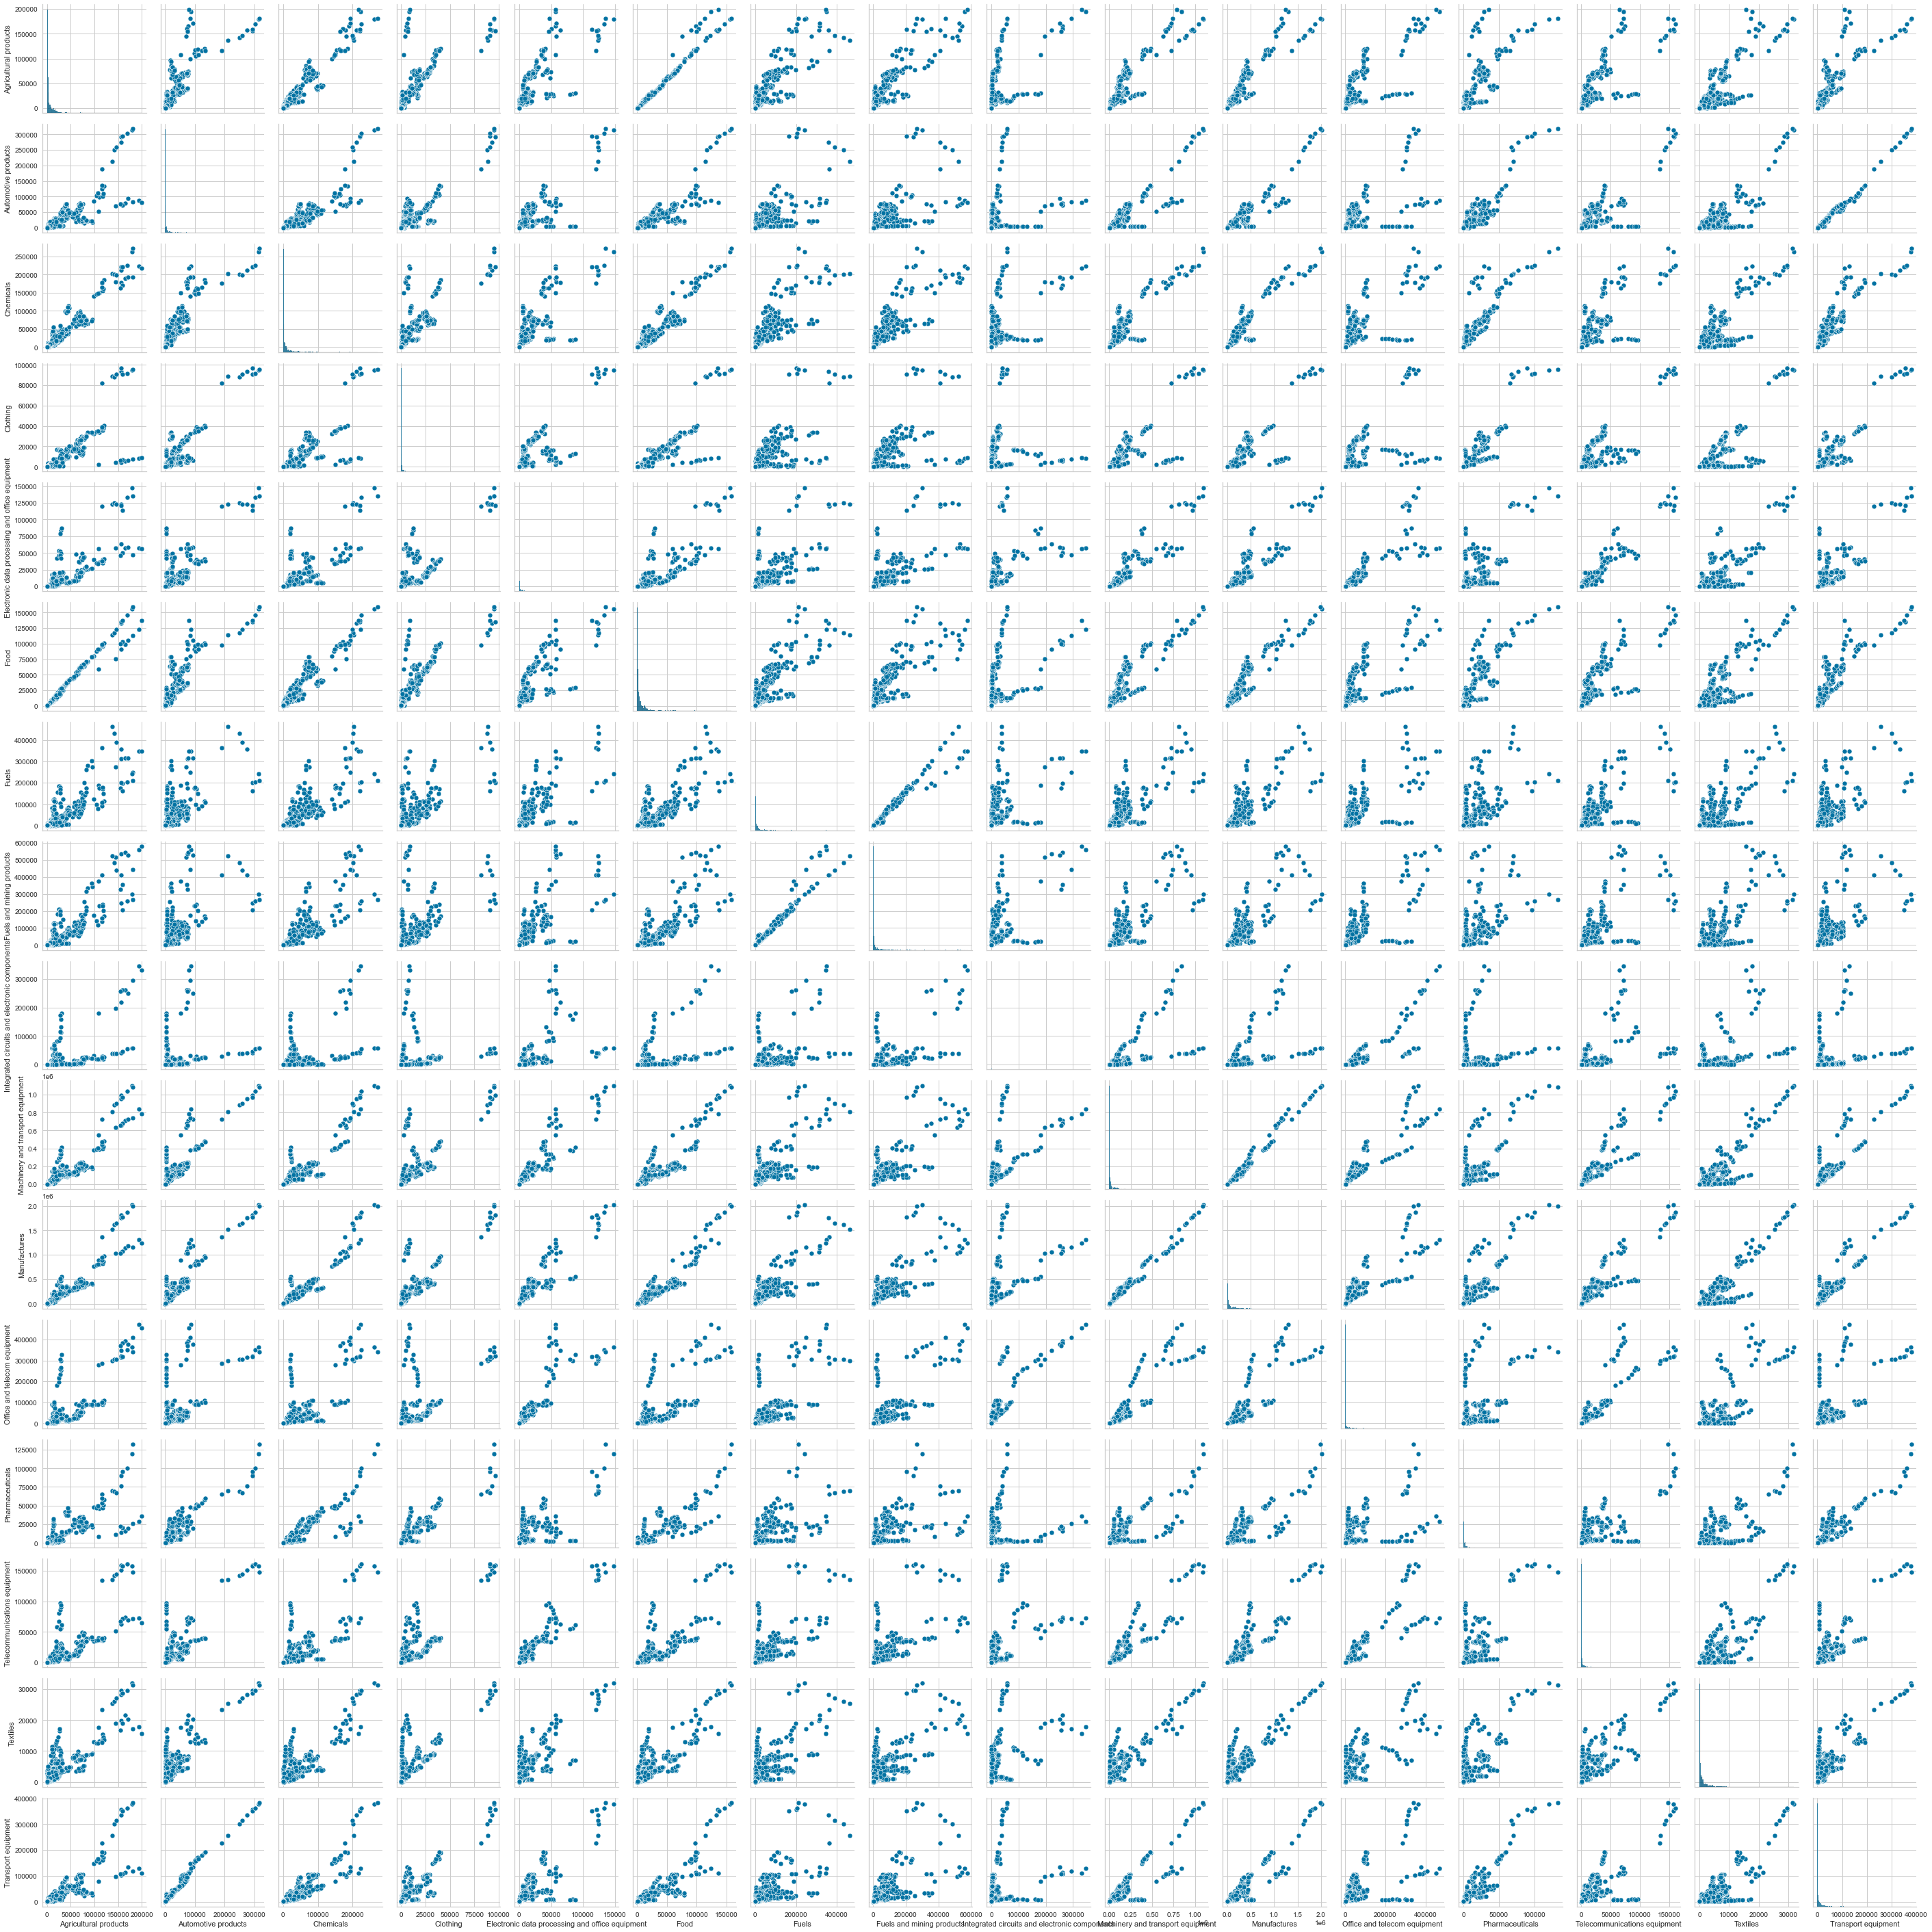

In [75]:
# Pairplot
sns.pairplot(df)
plt.show()

####  Correlation of all variables

In [43]:
# Correlation of variables
corr = df.corr()
corr

,Agricultural products,Automotive products,Chemicals,Clothing,Electronic data processing and office equipment,Food,Fuels,Fuels and mining products,Integrated circuits and electronic components,Machinery and transport equipment,Manufactures,Office and telecom equipment,Pharmaceuticals,Telecommunications equipment,Textiles,Transport equipment
Agricultural products,1.000000,0.841932,0.966753,0.804741,0.834064,0.988936,0.880258,0.902980,0.627921,0.929830,0.947102,0.832904,0.848199,0.831694,0.889586,0.873797
Automotive products,0.841932,1.000000,0.884686,0.926672,0.851448,0.873036,0.721309,0.693526,0.334745,0.901671,0.930927,0.693063,0.921294,0.854115,0.844632,0.992689
Chemicals,0.966753,0.884686,1.000000,0.820801,0.829464,0.961501,0.864265,0.875827,0.566216,0.927717,0.957165,0.794867,0.910599,0.817218,0.886033,0.911809
Clothing,0.804741,0.926672,0.820801,1.000000,0.862654,0.861273,0.733316,0.667581,0.242352,0.840802,0.883597,0.652735,0.916777,0.867330,0.811136,0.925108
Electronic data processing and office equipment,0.834064,0.851448,0.829464,0.862654,1.000000,0.845836,0.793939,0.771851,0.584831,0.944851,0.936707,0.901895,0.788071,0.967027,0.854418,0.853601
Food,0.988936,0.873036,0.961501,0.861273,0.845836,1.000000,0.856464,0.857566,0.539674,0.920712,0.948191,0.794771,0.892705,0.844810,0.883896,0.902008
Fuels,0.880258,0.721309,0.864265,0.733316,0.793939,0.856464,1.000000,0.981651,0.589788,0.838612,0.852437,0.783887,0.709202,0.776793,0.790127,0.748085
Fuels and mining products,0.902980,0.693526,0.875827,0.667581,0.771851,0.857566,0.981651,1.000000,0.692184,0.851297,0.853765,0.823886,0.674288,0.755739,0.795854,0.724423
Integrated circuits and electronic components,0.627921,0.334745,0.566216,0.242352,0.584831,0.539674,0.589788,0.692184,1.000000,0.685252,0.611485,0.871233,0.277633,0.573236,0.549430,0.365682
Machinery and transport equipment,0.929830,0.901671,0.927717,0.840802,0.944851,0.920712,0.838612,0.851297,0.685252,1.000000,0.992000,0.930079,0.828663,0.941888,0.908121,0.915930


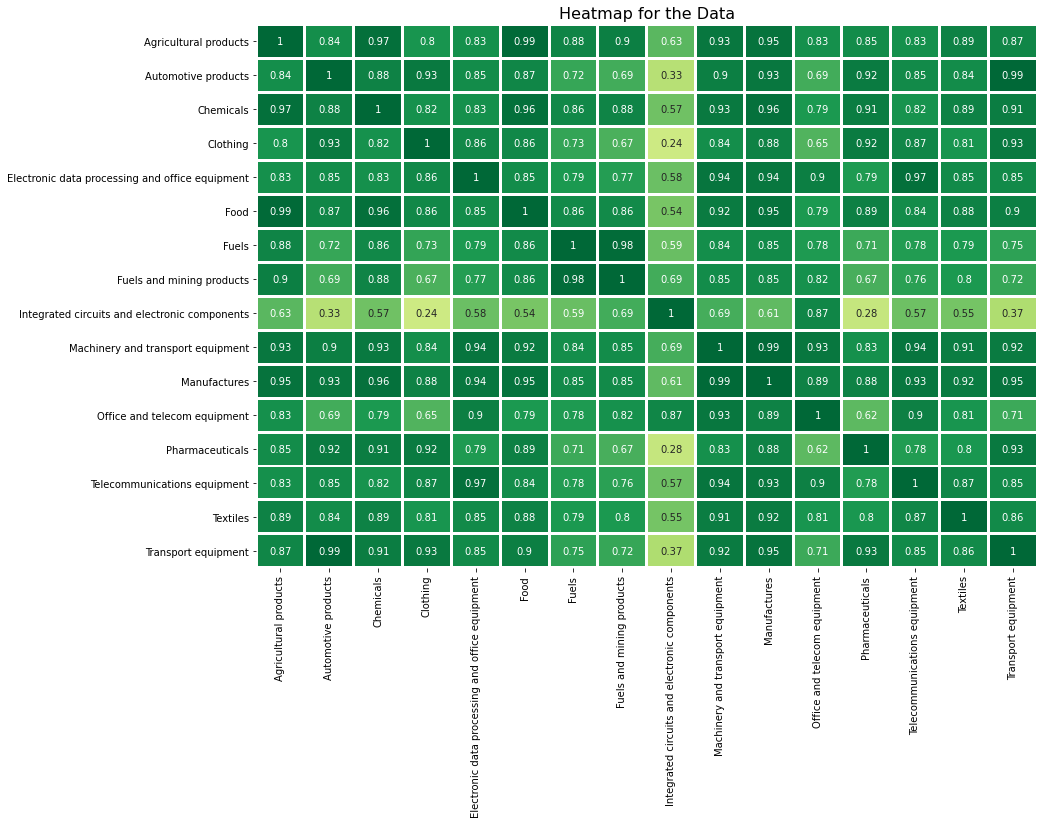

In [44]:
# Heatmap for visualization
plt.figure(figsize=(14,10))
heatmap = sns.heatmap(corr, cmap="RdYlGn", cbar=False, annot=True, linecolor='white', linewidths=2, vmin=-1, vmax=1) 
plt.title('Heatmap for the Data', fontsize = 16)
plt.show()

#### Outliers in the dataset

>##### 1. Outlier detection using visualization (Boxplot)

In [72]:
# Define a function called "plt_boxplot"
def plt_boxplot(df, col):
    plt.figure(figsize=(20,4))
    sns.boxplot(df[col])
    plt.show()

In [73]:
df.columns

Index(['Year', 'Reporting Economy', 'Agricultural products',
       'Automotive products', 'Chemicals', 'Clothing',
       'Electronic data processing and office equipment', 'Food', 'Fuels',
       'Fuels and mining products',
       'Integrated circuits and electronic components',
       'Machinery and transport equipment', 'Manufactures',
       'Office and telecom equipment', 'Pharmaceuticals',
       'Telecommunications equipment', 'Textiles', 'Transport equipment'],
      dtype='object')

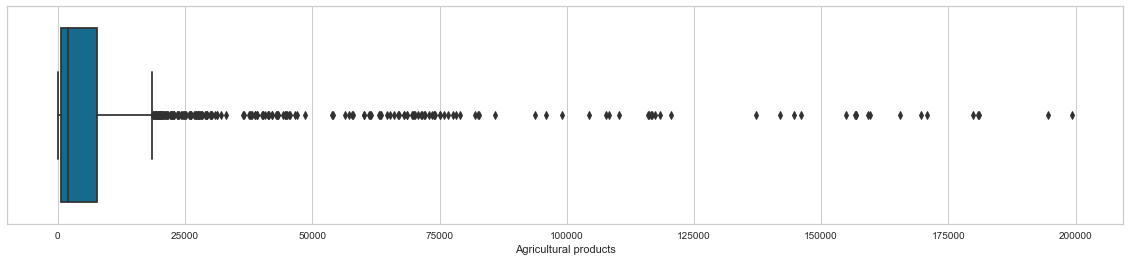

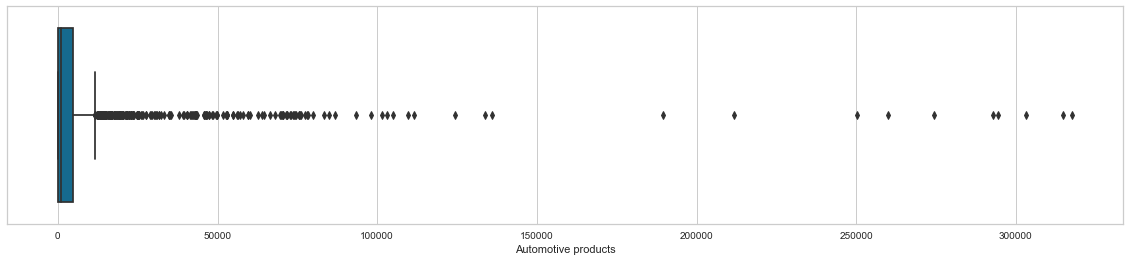

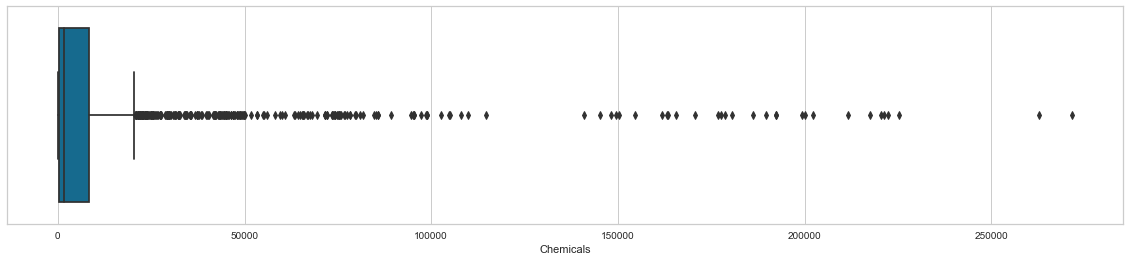

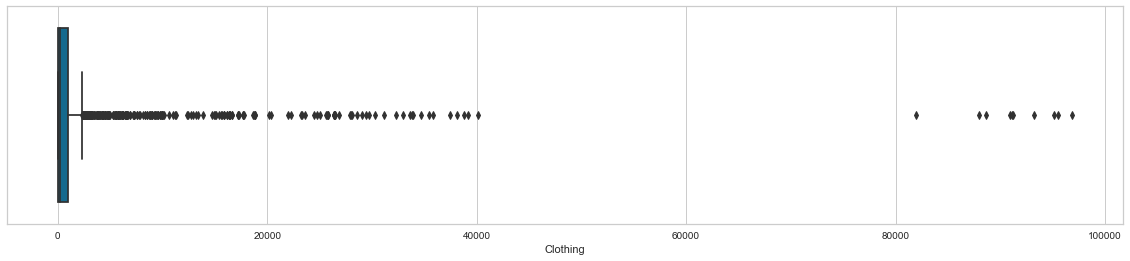

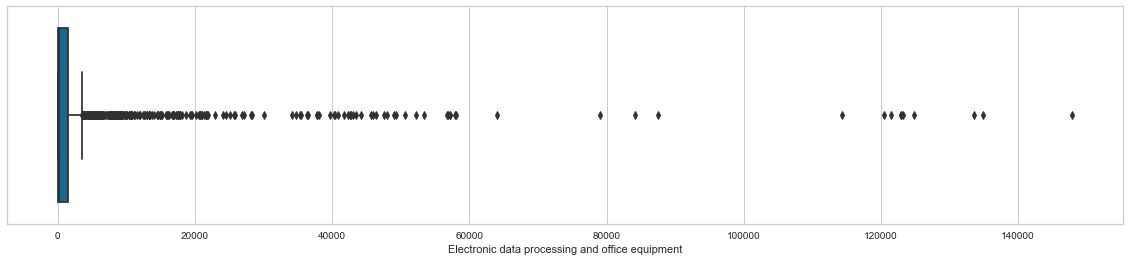

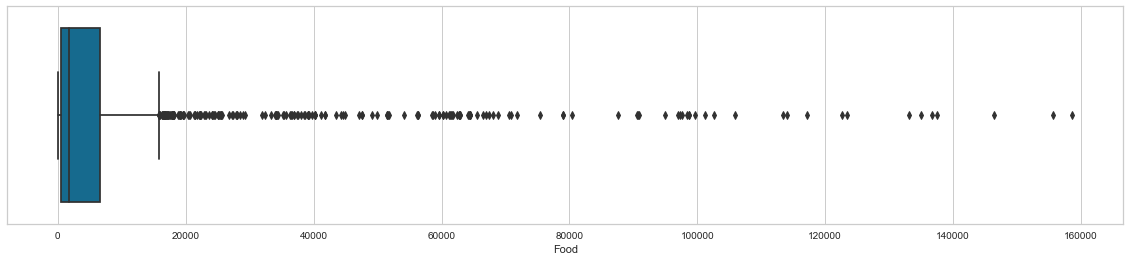

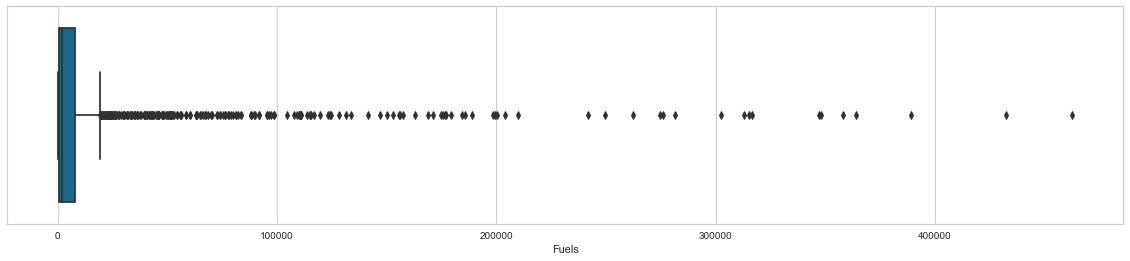

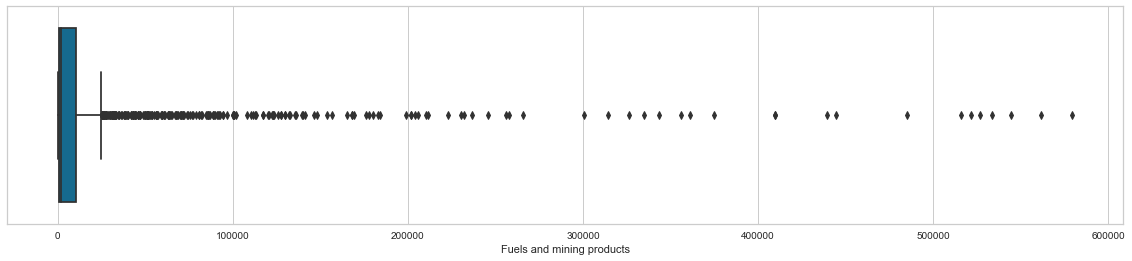

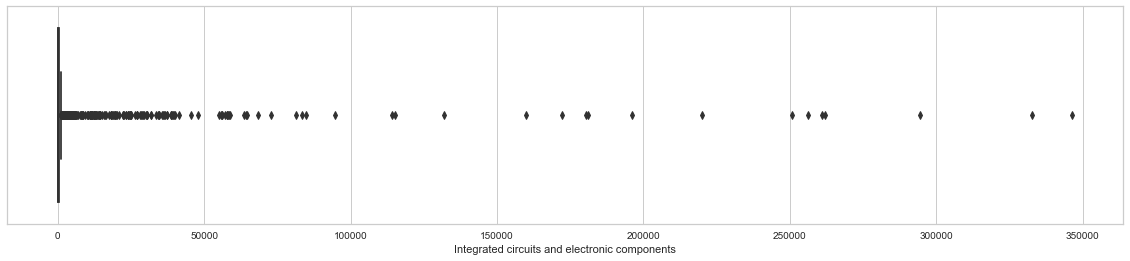

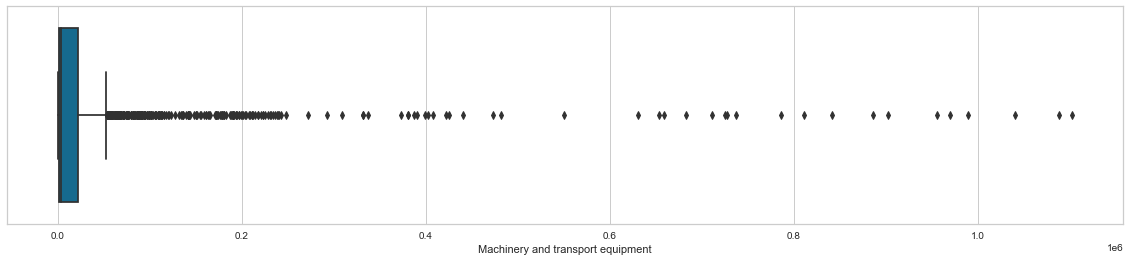

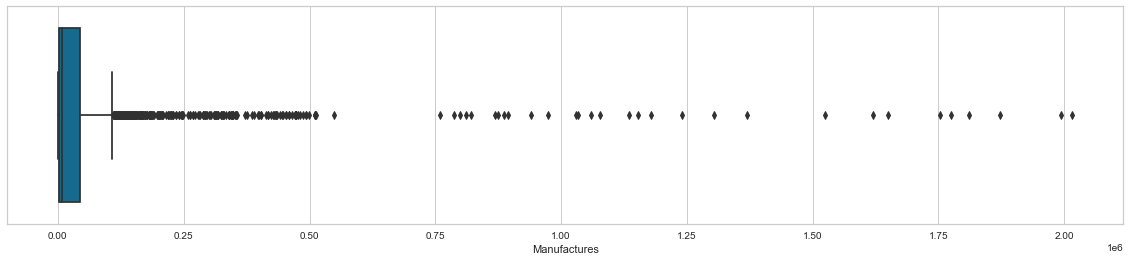

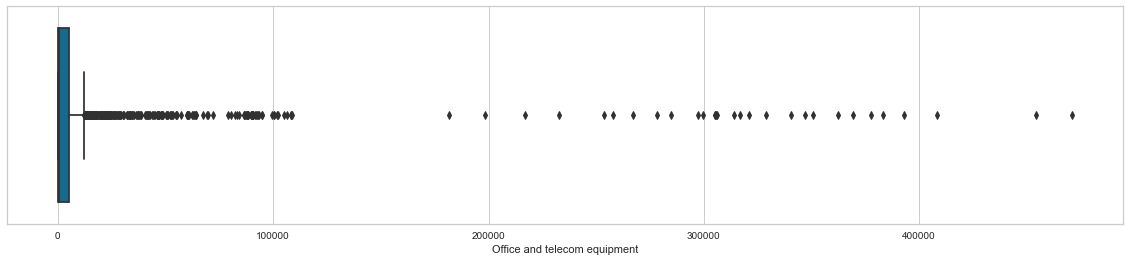

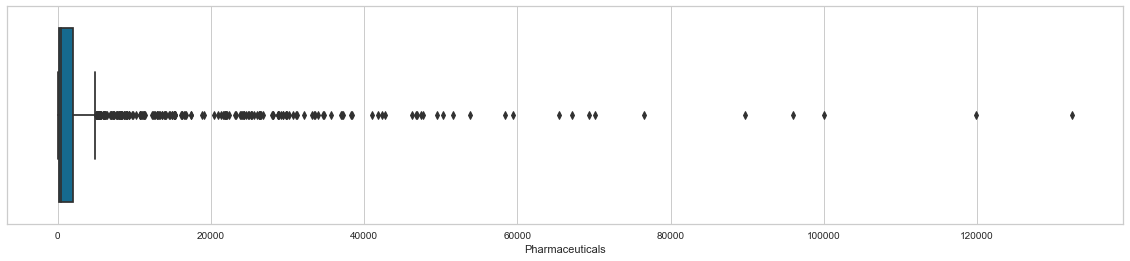

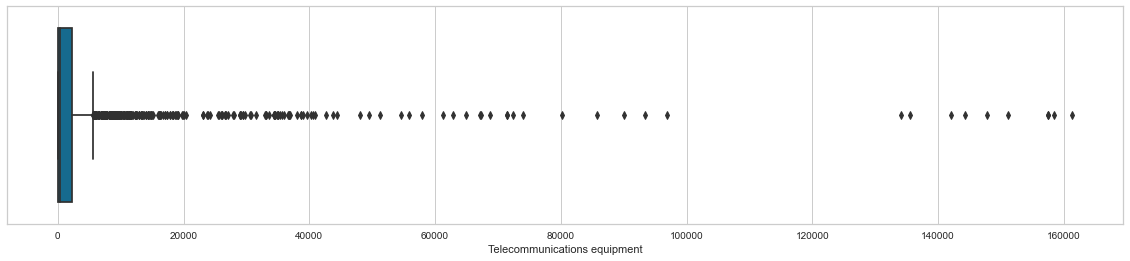

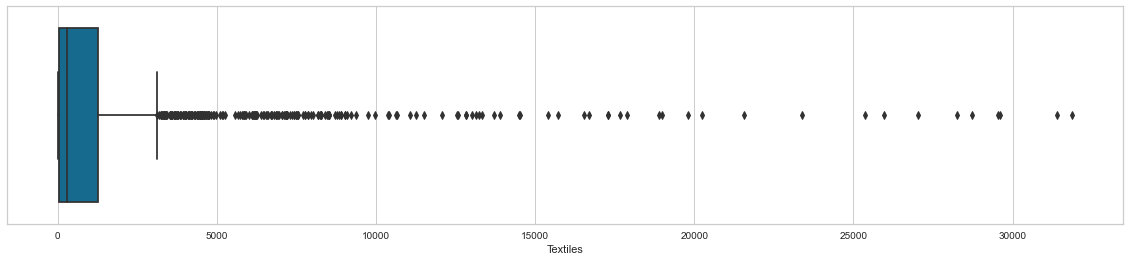

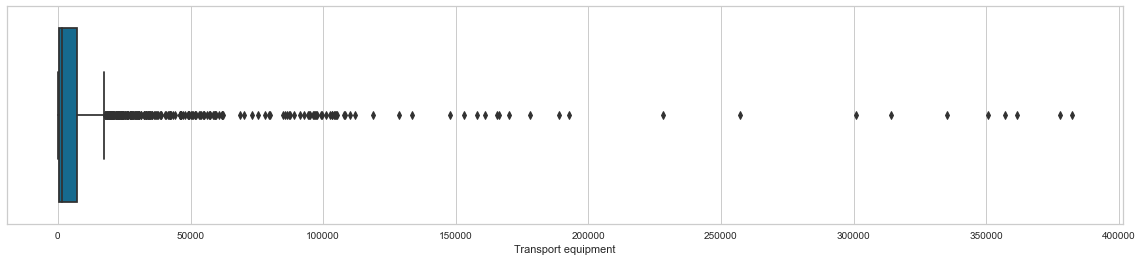

In [74]:
# Identify if there are any outliers in the dataset based on statistical measures.
cols = df.iloc[:,2:].columns

for col in cols:
    plt_boxplot(df, col)

**Conclusion**: as we can see in our boxplots we identified so many outliers in our data...

>##### 2. Deal with our outliers

In [ ]:
# 

#### Analytical Transformations

In [49]:
# Review our columns
df.columns

Index(['Year', 'Reporting Economy', 'Agricultural products',
       'Automotive products', 'Chemicals', 'Clothing',
       'Electronic data processing and office equipment', 'Food', 'Fuels',
       'Fuels and mining products',
       'Integrated circuits and electronic components',
       'Machinery and transport equipment', 'Manufactures',
       'Office and telecom equipment', 'Pharmaceuticals',
       'Telecommunications equipment', 'Textiles', 'Transport equipment'],
      dtype='object')

In [50]:
# We will drop ['Year','Reporting Economy']
X = df.drop(['Year','Reporting Economy'], axis=1)
y = df['Reporting Economy']

'''
Checking the shape of:
'''
# --> the data
print('X:', X.shape)
    
# --> the target variable
print('y:', y.shape)

X: (1710, 16)
y: (1710,)


>##### Scaling the data

In [77]:
# Importing the StandardScaler & MinMaxScaler Module from Sklearn
from sklearn.preprocessing import StandardScaler as ss, MinMaxScaler

In [52]:
# Creating object for the MinMaxScaler function
scala = MinMaxScaler()

In [53]:
scala.fit_transform(X)

scaled_array = scala.transform(X)
scaled_array

array([[0.00354068, 0.00060745, 0.00030171, ..., 0.00011774, 0.00370103,
        0.000515  ],
       [0.00437319, 0.00068299, 0.00170724, ..., 0.0006135 , 0.00526927,
        0.00063002],
       [0.03686114, 0.01252982, 0.01638066, ..., 0.00371197, 0.011009  ,
        0.01335338],
       ...,
       [0.00938329, 0.00057283, 0.00121788, ..., 0.00017971, 0.00222689,
        0.0005516 ],
       [0.00285862, 0.00159888, 0.00528361, ..., 0.00076842, 0.0015996 ,
        0.00166264],
       [0.00202611, 0.00100717, 0.00329306, ..., 0.00017351, 0.00207007,
        0.00101431]])

In [54]:
# Convert the scaled array to dataframe
X = pd.DataFrame(scaled_array, columns=list(X.columns))

In [55]:
# Display the Scale Dataframe
display(X.head())
display(X.shape)

,Agricultural products,Automotive products,Chemicals,Clothing,Electronic data processing and office equipment,Food,Fuels,Fuels and mining products,Integrated circuits and electronic components,Machinery and transport equipment,Manufactures,Office and telecom equipment,Pharmaceuticals,Telecommunications equipment,Textiles,Transport equipment
0,0.003541,0.000607,0.000302,0.000124,0.000000,0.004430,0.002321,0.001879,0.000000,0.000306,0.000488,0.000040,0.000000,0.000118,0.003701,0.000515
1,0.004373,0.000683,0.001707,0.001785,0.000426,0.005187,0.001370,0.001382,0.000040,0.000792,0.001354,0.000374,0.001170,0.000613,0.005269,0.000630
2,0.036861,0.012530,0.016381,0.001889,0.003516,0.042099,0.001872,0.002574,0.000277,0.015153,0.015556,0.002579,0.012978,0.003712,0.011009,0.013353
3,0.014454,0.003789,0.003543,0.001311,0.001176,0.017400,0.006709,0.005575,0.000055,0.005869,0.005218,0.001191,0.001117,0.002287,0.003387,0.005464
4,0.000567,0.000060,0.000121,0.000083,0.000047,0.000655,0.000004,0.000009,0.000003,0.000089,0.000120,0.000032,0.000068,0.000050,0.000376,0.000133


(1710, 16)

>#####  PCA: Principal Component Analysis

In [78]:
# PCA with data scaled with MinMaxScaler()
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)

In [57]:
pca_array = pca.fit_transform(X)

In [58]:
pca_array

array([[-0.12820267,  0.00247122],
       [-0.12587537,  0.00114029],
       [-0.07997465, -0.00937776],
       ...,
       [-0.12344391,  0.00224359],
       [-0.12527212,  0.00159594],
       [-0.12740686,  0.00219158]])

In [59]:
# Convert to dataframe
df_pca = pd.DataFrame(data=pca_array, columns=['PCA1','PCA2'])

In [60]:
# Overview the data
df_pca

,PCA1,PCA2
0,-0.128203,0.002471
1,-0.125875,0.001140
2,-0.079975,-0.009378
3,-0.111638,0.001603
4,-0.132704,0.001883
...,...,...
1705,-0.124167,0.001454
1706,0.305446,0.091375
1707,-0.123444,0.002244
1708,-0.125272,0.001596


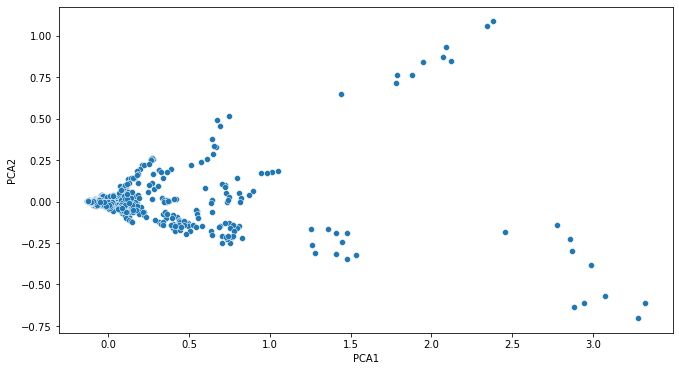

In [61]:
# Visualize with scatterplot
plt.figure(figsize=(11,6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2')
plt.show()

#### Creating clusters using K-Means algorithms

>##### 1. Find the optimal K for the cluster using Elbow method

In [62]:
# Yellowbrick
from yellowbrick.cluster import KElbowVisualizer

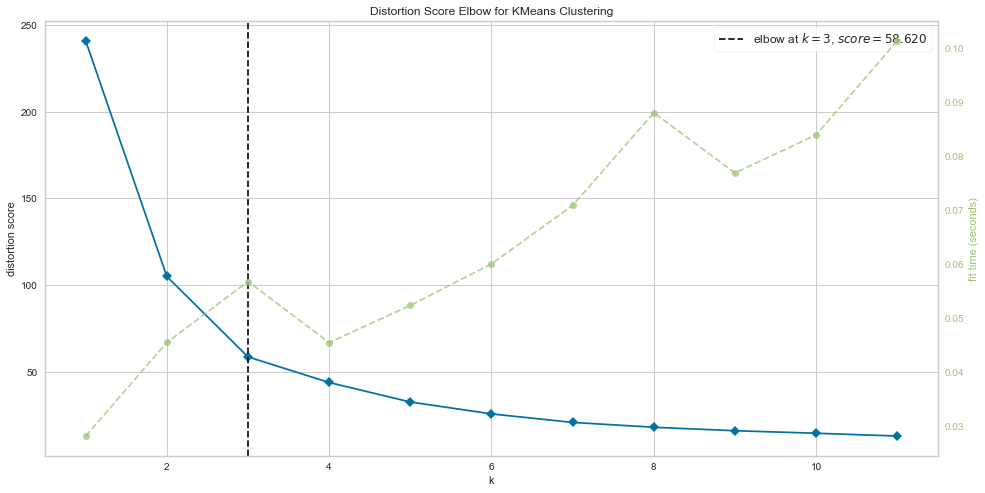

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
# Yellowbrick
model = KMeans()
plt.figure(figsize=(16,8))
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(X)
visualizer.show()

**Conclusion**: as we can see in the graph above, the KElbowVisualizer is at k=3 this means the optimal k for the dataset is 3

>##### 2. Evaluation with the silhouette method

In [64]:
# Import Silhouette module
from sklearn.metrics import silhouette_score,silhouette_samples

In [65]:
silh = {}

for k in range(2,15):
    km = KMeans(n_clusters=k)
    preds = km.fit_predict(X)
    centers = km.cluster_centers_
    
    silh = silhouette_score(X, preds)
    
    
    print("For number of cluster = {}, The silhouette score is {}".format(k, silh))

For number of cluster = 2, The silhouette score is 0.9050949967701445
For number of cluster = 3, The silhouette score is 0.8254232906671023
For number of cluster = 4, The silhouette score is 0.8274721090648365
For number of cluster = 5, The silhouette score is 0.7361787942129271
For number of cluster = 6, The silhouette score is 0.7407553855036919
For number of cluster = 7, The silhouette score is 0.7369678377452508
For number of cluster = 8, The silhouette score is 0.7205017702919647
For number of cluster = 9, The silhouette score is 0.7090817036259616
For number of cluster = 10, The silhouette score is 0.7243003755337651
For number of cluster = 11, The silhouette score is 0.7111287317616073
For number of cluster = 12, The silhouette score is 0.601443626016641
For number of cluster = 13, The silhouette score is 0.6101488222441135
For number of cluster = 14, The silhouette score is 0.6090703159812428


**Conclusion**: as we can see the best cluster to use here is also 3

>##### 3. Creating our K-Means modele

In [ ]:
# init model
k_model = KMeans(n_clusters=3)

k_model.fit(X)

In [ ]:
# Labels and Inertia

y_kmeans = k_model.labels_

print('Labels:',k_model.labels_)
print('Inertia:',k_model.inertia_)

In [ ]:
# Centroid/Cluster Centers
centroids = k_model.cluster_centers_
print('Labels:', centroids)

In [ ]:
# Add the labels to the dataframe
X['Labels_Clusters'] = y_kmeans
X['Labels_Clusters'].value_counts()

>##### 3. Visualizing the clusters

In [ ]:
X

<br><br>

<h1 align="center"> Reflections </h1>

#### Summary of Data Analysis

>##### Total Products imported by countries from 2010 to 2019

In [93]:
# Reviews the cleaned df
df.head(3)

,Year,Reporting Economy,Agricultural products,Automotive products,Chemicals,Clothing,Electronic data processing and office equipment,Food,Fuels,Fuels and mining products,Integrated circuits and electronic components,Machinery and transport equipment,Manufactures,Office and telecom equipment,Pharmaceuticals,Telecommunications equipment,Textiles,Transport equipment,Total
0,2010,Afghanistan,706,193,82,12,0,706,1075,1090,0,339,984,19,0,19,118,197,11080
1,2010,Albania,872,217,464,173,63,826,635,802,14,875,2731,176,155,99,168,241,17022
2,2010,Algeria,7350,3981,4452,183,520,6683,867,1493,96,16716,31367,1215,1719,599,351,5108,165400


In [101]:
# Calculate the total imported per countries & Per Year products
df['Total'] = df.iloc[:,2:].sum(axis=1)

In [102]:
# The Dataframe with the new ['Total'] column
df.tail(2)

,Year,Reporting Economy,Agricultural products,Automotive products,Chemicals,Clothing,Electronic data processing and office equipment,Food,Fuels,Fuels and mining products,Integrated circuits and electronic components,Machinery and transport equipment,Manufactures,Office and telecom equipment,Pharmaceuticals,Telecommunications equipment,Textiles,Transport equipment,Total
2007,2019,Zambia,570,508,1436,71,82,519,1256,1624,15,2185,4998,221,211,124,51,636,69868
2008,2019,Zimbabwe,404,320,895,13,54,386,1461,1502,28,1160,2838,111,212,28,66,388,47644


In [116]:
# GroupBy Years
gb_y = df.groupby(by='Year')
gb_y.sum()

,Agricultural products,Automotive products,Chemicals,Clothing,Electronic data processing and office equipment,Food,Fuels,Fuels and mining products,Integrated circuits and electronic components,Machinery and transport equipment,Manufactures,Office and telecom equipment,Pharmaceuticals,Telecommunications equipment,Textiles,Transport equipment,Total
Year,,,,,,,,,,,,,,,,,
2010,1346112,1065380,1719054,356731,587102,1105642,2249165,2938192,611706,5168852,10064075,1881246,465885,682460,222087,1483816,154663146
2011,1643132,1253451,2019677,408931,612465,1336268,3064816,3942547,638447,5836541,11517553,1989029,513519,738119,255177,1724007,181530739
2012,1622593,1284140,1983345,394613,616996,1341404,3196184,3979011,631008,5921752,11480463,2027305,515810,779294,243021,1763855,183002283
2013,1684425,1322366,2034861,409520,603406,1400129,3093728,3862223,690416,6086128,11780496,2111252,533699,817433,255323,1819543,186470162
2014,1735510,1379770,2092883,432386,604973,1453009,2872538,3617719,706597,6306822,12250622,2145143,564908,833575,263565,1926325,189686203
2015,1568077,1310088,1904478,407675,548601,1319526,1753025,2357294,706309,5971177,11393608,2076138,544600,821238,247382,1826193,168038126
2016,1573765,1349688,1866995,402328,518392,1334497,1445457,2017503,732129,5966807,11295326,2048730,558321,798216,245428,1854948,164331482
2017,1731345,1454194,2052331,421948,654085,1460762,1894474,2615303,861395,6553642,12339891,2315694,601900,805302,261284,1979562,183701657
2018,1819634,1539749,2293471,451429,729489,1527122,2422038,3227928,983827,7099420,13429893,2505741,664387,797318,277524,2102827,202525213


In [121]:
gb_total = df.groupby(by=['Year', 'Reporting Economy']).sum()
gb_total

Agricultural products  \
Year Reporting Economy                                          
2010 Afghanistan                                          706   
     Albania                                              872   
     Algeria                                             7350   
     Angola                                              2882   
     Antigua and Barbuda                                  113   
...                                                       ...   
2019 Venezuela, Bolivarian Republic of                   1334   
     Viet Nam                                           26023   
     Yemen                                               1871   
     Zambia                                               570   
     Zimbabwe                                             404   

                                        Automotive products  Chemicals  \
Year Reporting Economy                                                   
2010 Afghanistan                                        193         82   
     Albania                                            217        464   
     Algeria                                           3981       4452   
     Angola                                            1204        963   
     Antigua and Barbuda                                 19         33   
...                                                     ...        ...   
2019 Venezuela, Bolivarian Republic of                  194        696   
     Viet Nam                                          6345      29675   
     Yemen                                              182        331   
     Zambia                                             508       1436   
     Zimbabwe                                           320        895   

                                        Clothing  \
Year Reporting Economy                             
2010 Afghanistan                              12   
     Albania                                 173   
     Algeria                                 183   
     Angola                                  127   
     Antigua and Barbuda                       8   
...                                          ...   
2019 Venezuela, Bolivarian Republic of       117   
     Viet Nam                                932   
     Yemen                                    60   
     Zambia                                   71   
     Zimbabwe                                 13   

                                        Electronic data processing and office equipment  \
Year Reporting Economy                                                                    
2010 Afghanistan                                                                      0   
     Albania                                                                         63   
     Algeria                                                                        520   
     Angola                                                                         174   
     Antigua and Barbuda                                                              7   
...                                                                                 ...   
2019 Venezuela, Bolivarian Republic of                                               74   
     Viet Nam                                                                     20612   
     Yemen                                                                           10   
     Zambia                                                                          82   
     Zimbabwe                                                                        54   

                                         Food  Fuels  \
Year Reporting Economy                                 
2010 Afghanistan                          706   1075   
     Albania                              826    635   
     Algeria                             6683    867   
     Angola                              2764   3105   
     Antigua and Barbuda          

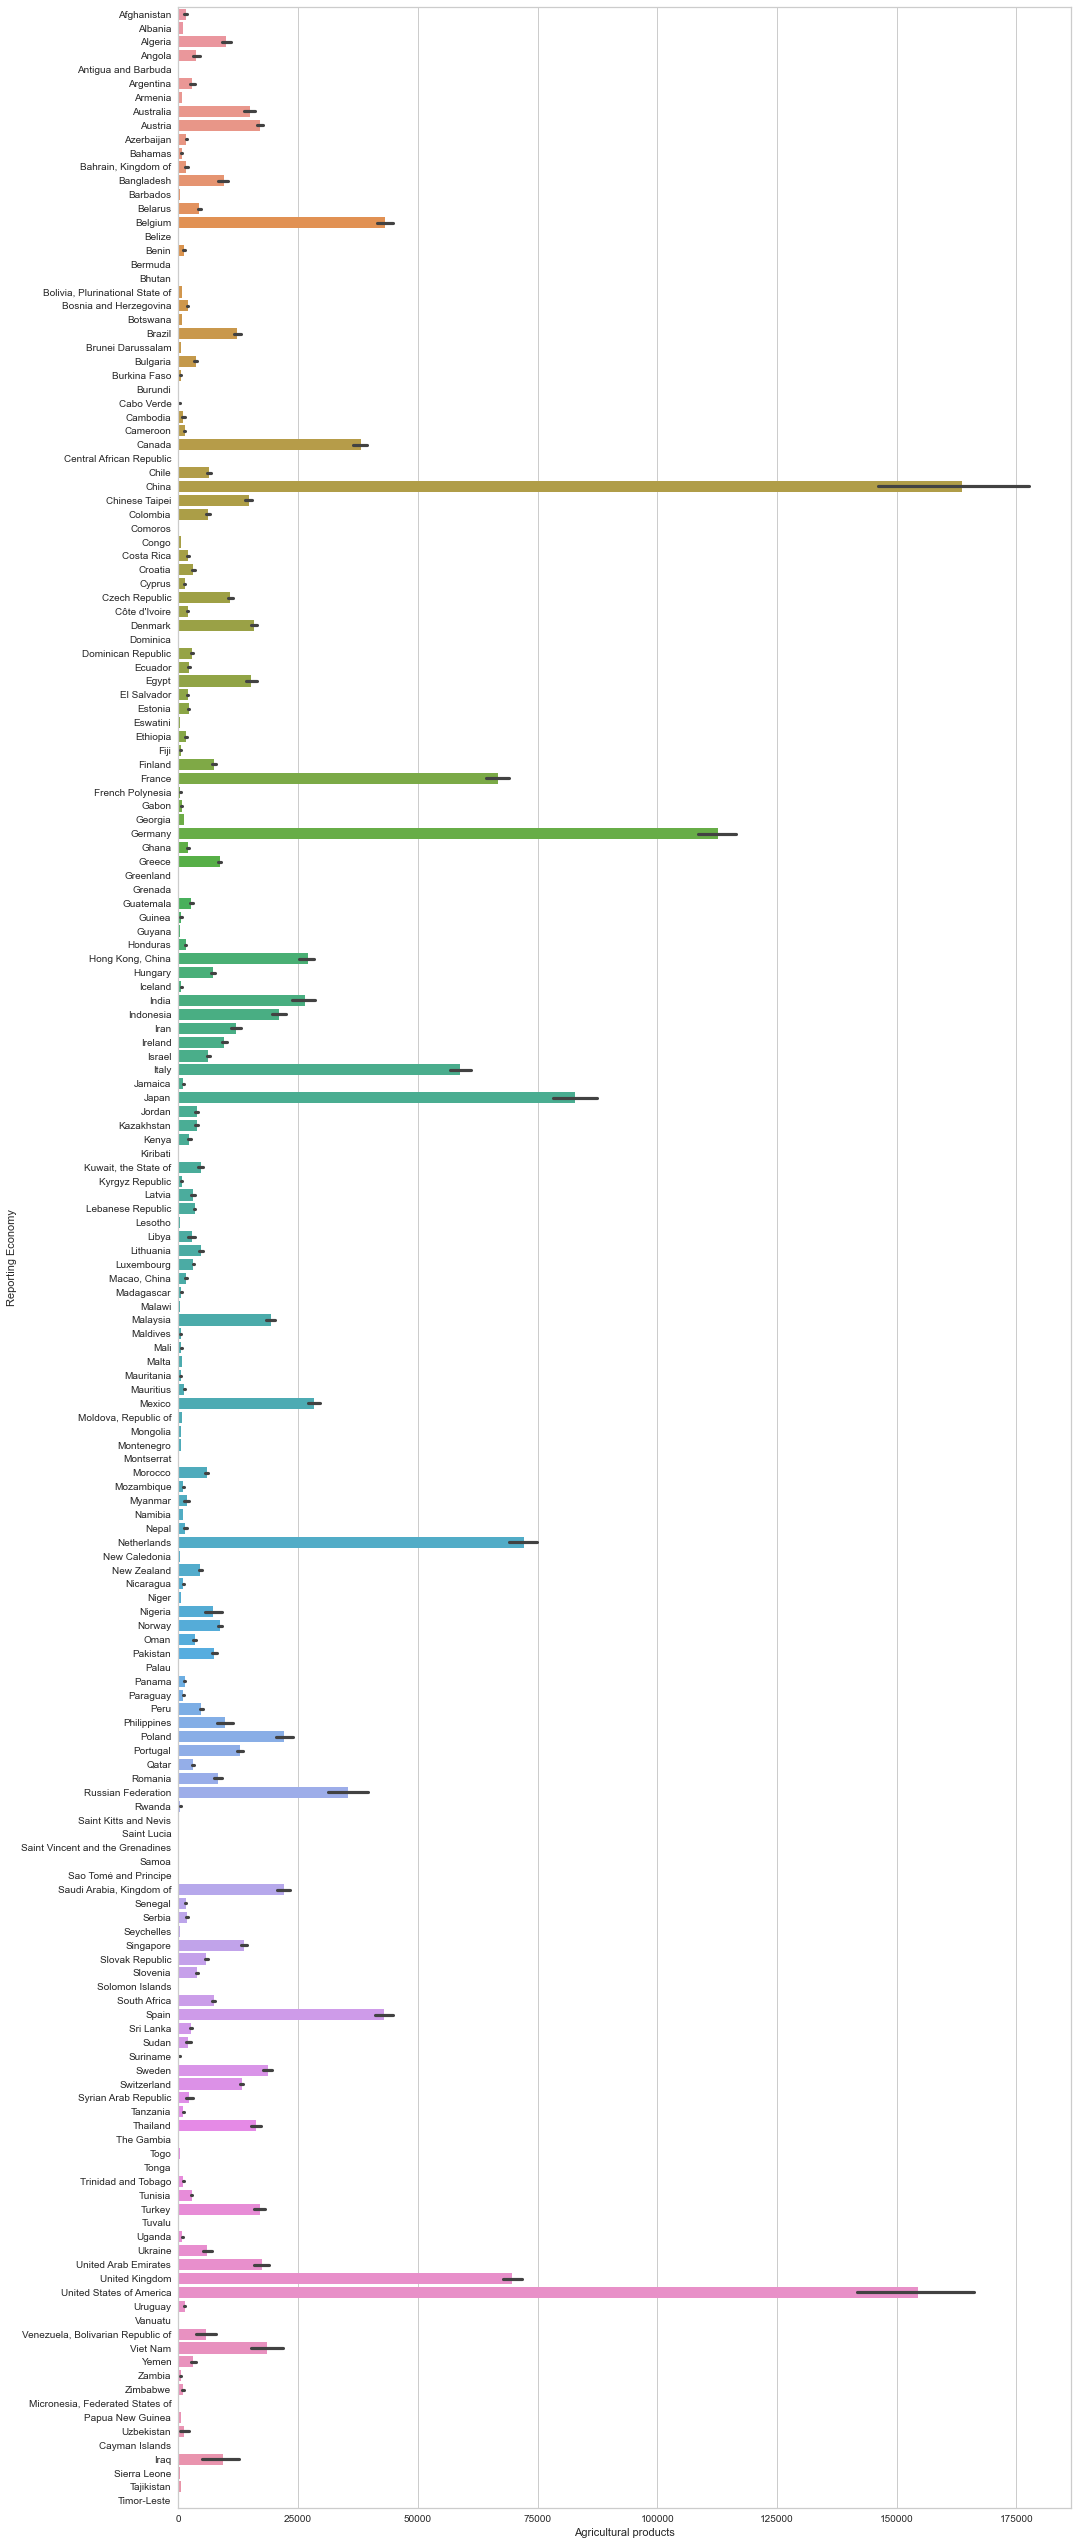

In [155]:
# Display a graph to show more details
gb_total = df.groupby(by='Reporting Economy').sum()

plt.figure(figsize=(16, 46))
sns.barplot(data = df, y="Reporting Economy", x="Agricultural products")
plt.show()

#### Questions unanswered

In [ ]:
# What aspects of the research question were we unable to answer and why?

#### Recommendations

In [ ]:
# Identify if there are any outliers in the dataset based on statistical measures.

#### Next Steps

In [ ]:
# What will the analyst do next based on the analysis?